# Import necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.datasets import fetch_california_housing

# Load the California Housing dataset

In [ ]:
california_housing = fetch_california_housing()
data = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
data['PRICE'] = california_housing.target


# Explore the dataset

In [ ]:
print(data.describe())
print("_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _")
print("columns : ",end=' ')
for i in data.columns:
  print(i,end=', ' )


             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude         PRICE  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

# Preprocessing the Data

In [ ]:
print(data.isnull().sum())
data.dropna(inplace=True)
required_features =['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
target=['PRICE']
X = data[required_features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=36)

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
PRICE         0
dtype: int64


# Check for linearity and visualize the data

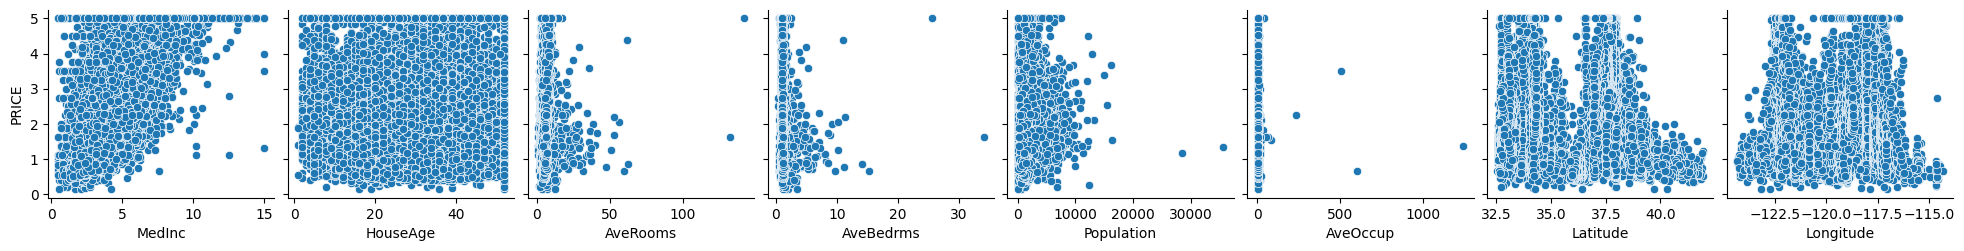

In [ ]:
sns.pairplot(data, x_vars=required_features, y_vars=target, kind='scatter', diag_kind='auto')
plt.show()

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

score=model.score(X_test, y_test)
print("model score is :",score*100)


model score is : 58.65144222438181


In [ ]:
model = sm.OLS(y_train, sm.add_constant(X_train)).fit()
residuals = model.resid

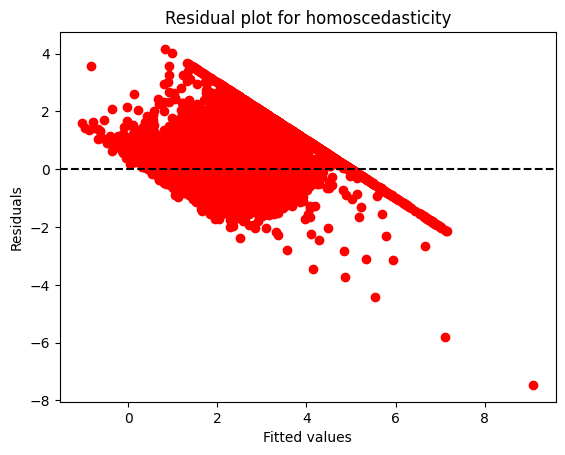

In [ ]:
plt.scatter(model.predict(), residuals, color='red')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residual plot for homoscedasticity')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

# Check for normality of residuals

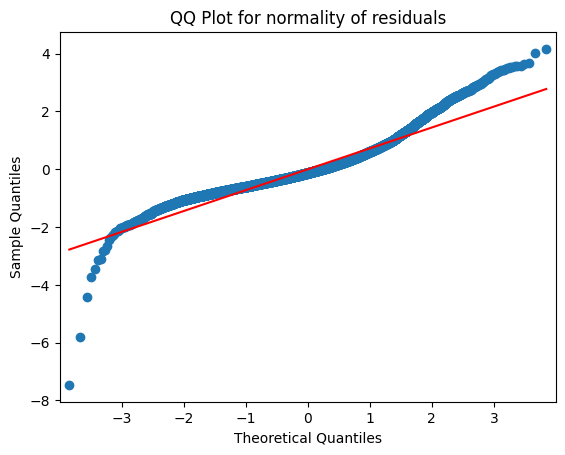

In [ ]:

sm.qqplot(residuals, line='s')
plt.title('QQ Plot for normality of residuals')
plt.show()

# Check for multicollinearity using variance inflation factor (VIF)

In [ ]:
X_train_with_const = sm.add_constant(X_train)
vif = pd.DataFrame()
vif["Variable"] = X_train_with_const.columns
vif["VIF"] = [variance_inflation_factor(X_train_with_const.values, i) for i in range(X_train_with_const.shape[1])]
print(vif)

     Variable           VIF
0       const  17162.298283
1      MedInc      2.504280
2    HouseAge      1.236864
3    AveRooms      8.771540
4   AveBedrms      7.425603
5  Population      1.132814
6    AveOccup      1.009483
7    Latitude      9.327349
8   Longitude      8.996092


# Make predictions on the testing set

In [ ]:
model = sm.OLS(y_train, sm.add_constant(X_train)).fit()
X_test_with_const = sm.add_constant(X_test)
y_pred = model.predict(X_test_with_const)

# Evaluate the model

In [ ]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R-squared:', metrics.r2_score(y_test, y_pred))

Mean Squared Error: 0.5319448504398684
R-squared: 0.5865144222438187


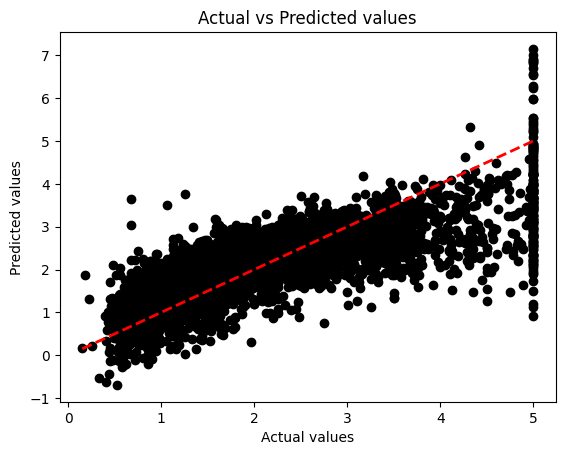

In [ ]:
plt.scatter(y_test, y_pred, color='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', linewidth=2)
plt.title('Actual vs Predicted values')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     3239.
Date:                Sun, 26 Nov 2023   Prob (F-statistic):               0.00
Time:                        05:29:42   Log-Likelihood:                -18070.
No. Observations:               16512   AIC:                         3.616e+04
Df Residuals:                   16503   BIC:                         3.623e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -37.3452      0.737    -50.664      0.0